In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score,roc_curve,auc
from sklearn.svm import LinearSVC
from nltk.corpus import stopwords

# Dataset 1

In [10]:
training_set = pd.read_csv("../dataset/labeledTrainData.tsv",sep='\t')

Y=training_set['sentiment'].values
X=training_set['review'].values

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42,stratify=Y)
print ("No. of Training Examples: ",x_train.shape)
print ("No. of Testing Examples: ",x_test.shape)

No. of Training Examples:  (20000,)
No. of Testing Examples:  (5000,)


# Dataset 2

In [9]:
train_data = pd.read_csv("../dataset/dataset2_train.csv")
test_data = pd.read_csv("../dataset/dataset2_test.csv")

y_train = train_data['sentiment']
x_train = train_data['review']

y_test = test_data['sentiment']
x_test = test_data['review']
print ("No. of Training Examples: ",x_train.shape)
print ("No. of Testing Examples: ",x_test.shape)

No. of Training Examples:  (25000,)
No. of Testing Examples:  (4253,)


In [ ]:
import string
def text_process(text):
    #this func remove all punctuations and stopwords and finnaly returned cleaned text as list of words
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [3]:
tf=TfidfVectorizer(min_df=10,max_df=0.95,use_idf=True)

tf.fit_transform(x_train)
X_train=tf.transform(x_train) # for train data we can use fit_transfrom also.
X_test=tf.transform(x_test)
pickle.dump(tf, open('vectorizer.sav', 'wb'))

In [4]:
# Evaluating models peformance based on precision, recall and accuracy
def do_evaluation (predicted, actual, pos_label=0, verbose=True):
    precision = precision_score(actual,predicted,pos_label=pos_label)
    recall = recall_score(actual,predicted,pos_label=pos_label)
    accuracy = accuracy_score(actual,predicted)
    f1score = f1_score(predicted,actual)

    if verbose:
        print('"Positive' if pos_label==1 else '"Negative','Evaluation"','| Precision ==',round(precision*100,2),'| Recall ==',round(recall*100,2),'| Accuracy ==',round(accuracy*100,2),'| F1 score ==',round(f1score*100,2))

# Traning phase..

In [5]:
# Linear Support Vector Classifier
linear_svc = LinearSVC()
linear_svc.fit(X_train,y_train)
pickle.dump(linear_svc, open('linear_svc.sav', 'wb'))
# Testing phase
linear_svc_pred=linear_svc.predict(X_test)
print("svc Accuracy: ",round(accuracy_score(y_test,linear_svc_pred),3))
print ('{:.1%} of prediction are positive'.format(float(sum(linear_svc_pred))/len(y_test)))
print ('{:.1%} are actually positive'.format(float(sum(y_test))/len(y_test)))
do_evaluation (linear_svc_pred,y_test, pos_label= 1, verbose=True)
do_evaluation (linear_svc_pred,y_test, pos_label= 0, verbose=True)

svc Accuracy:  0.876
52.9% of prediction are positive
51.4% are actually positive
"Positive Evaluation" | Precision == 86.81 | Recall == 89.43 | Accuracy == 87.59 | F1 score == 88.1
"Negative Evaluation" | Precision == 88.46 | Recall == 85.64 | Accuracy == 87.59 | F1 score == 88.1


# E valuate classifier performance(roc and auc curve)

In [6]:
def display_curve(nb_pred,name):
    #Calculating False Positive Rate ,True Positive Rate and threshold
    fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_pred)
    #AUC is the percentage of the ROC plot that is underneath the curve:
    roc_auc_nb = auc(fpr_nb, tpr_nb)
    plt.title(f'Operating Characteristic for {name} Classifier')
    plt.plot(fpr_nb, tpr_nb, 'b', label = 'AUC = %0.2f' % roc_auc_nb)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

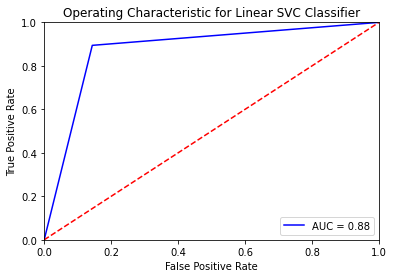

In [7]:
# Gaussian Naive Bayes Classifier
display_curve(linear_svc_pred,'Linear SVC')

# Testing

In [8]:
# Load model
linear_svc = pickle.load(open('linear_svc.sav','rb'))
tf = pickle.load(open('vectorizer.sav','rb'))

# Testing
test_array = ['love','good','fine','bad','worst']
test_func = lambda x: 'pos' if x==1 else 'neg'
linear = linear_svc.predict(tf.transform(test_array).toarray())

for sentence,l in zip(test_array,linear):
    print(sentence,': Linear SVC=',test_func(l))


love : Linear SVC= pos
good : Linear SVC= pos
fine : Linear SVC= neg
bad : Linear SVC= neg
worst : Linear SVC= neg
